22th   

Gradient Descent Variants

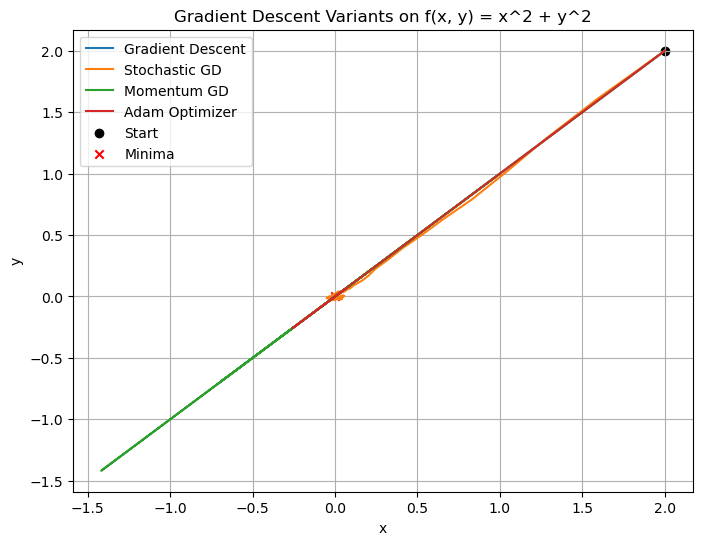

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its gradient
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])

# Gradient Descent Variants
class Optimizer:
    def __init__(self, lr=0.1, max_iters=100, tol=1e-6):
        self.lr = lr
        self.max_iters = max_iters
        self.tol = tol
    
    def optimize(self, x_init, y_init):
        pass

class GradientDescent(Optimizer):
    def optimize(self, x_init, y_init):
        x, y = x_init, y_init
        trajectory = [(x, y)]
        for _ in range(self.max_iters):
            grad = grad_f(x, y)
            x -= self.lr * grad[0]
            y -= self.lr * grad[1]
            trajectory.append((x, y))
            if np.linalg.norm(grad) < self.tol:
                break
        return trajectory

class StochasticGradientDescent(Optimizer):
    def optimize(self, x_init, y_init):
        x, y = x_init, y_init
        trajectory = [(x, y)]
        for _ in range(self.max_iters):
            grad = grad_f(x, y) + np.random.normal(0, 0.1, 2)  # Adding noise
            x -= self.lr * grad[0]
            y -= self.lr * grad[1]
            trajectory.append((x, y))
            if np.linalg.norm(grad) < self.tol:
                break
        return trajectory

class MomentumGradientDescent(Optimizer):
    def __init__(self, lr=0.1, max_iters=100, tol=1e-6, momentum=0.9):
        super().__init__(lr, max_iters, tol)
        self.momentum = momentum
    
    def optimize(self, x_init, y_init):
        x, y = x_init, y_init
        velocity = np.array([0, 0])
        trajectory = [(x, y)]
        for _ in range(self.max_iters):
            grad = grad_f(x, y)
            velocity = self.momentum * velocity - self.lr * grad
            x += velocity[0]
            y += velocity[1]
            trajectory.append((x, y))
            if np.linalg.norm(grad) < self.tol:
                break
        return trajectory

class AdamOptimizer(Optimizer):
    def __init__(self, lr=0.1, max_iters=100, tol=1e-6, beta1=0.9, beta2=0.999, epsilon=1e-8):
        super().__init__(lr, max_iters, tol)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
    
    def optimize(self, x_init, y_init):
        x, y = x_init, y_init
        m = np.array([0, 0])
        v = np.array([0, 0])
        trajectory = [(x, y)]
        for t in range(1, self.max_iters + 1):
            grad = grad_f(x, y)
            m = self.beta1 * m + (1 - self.beta1) * grad
            v = self.beta2 * v + (1 - self.beta2) * (grad**2)
            m_hat = m / (1 - self.beta1**t)
            v_hat = v / (1 - self.beta2**t)
            x -= self.lr * m_hat[0] / (np.sqrt(v_hat[0]) + self.epsilon)
            y -= self.lr * m_hat[1] / (np.sqrt(v_hat[1]) + self.epsilon)
            trajectory.append((x, y))
            if np.linalg.norm(grad) < self.tol:
                break
        return trajectory

# Running experiments
optimizers = {
    "Gradient Descent": GradientDescent(lr=0.1),
    "Stochastic GD": StochasticGradientDescent(lr=0.1),
    "Momentum GD": MomentumGradientDescent(lr=0.1, momentum=0.9),
    "Adam Optimizer": AdamOptimizer(lr=0.1)
}

x_init, y_init = 2.0, 2.0
trajectories = {}
for name, optimizer in optimizers.items():
    trajectories[name] = optimizer.optimize(x_init, y_init)

# Plot results
plt.figure(figsize=(8, 6))
for name, trajectory in trajectories.items():
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], label=name)
plt.scatter([x_init], [y_init], color='black', marker='o', label='Start')
plt.scatter([0], [0], color='red', marker='x', label='Minima')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent Variants on f(x, y) = x^2 + y^2")
plt.grid()
plt.show()
